In [1]:
from sklearn.datasets import load_digits

digits = load_digits()


In [2]:
for i in range(24):
    print(digits.images[i])


[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]
[[ 0.  0.  0.  4. 15. 12.  0.  0.]
 [ 0.  0.  3. 16. 15. 14.  0.  0.]
 [ 0.  0.  8. 13.  8. 16.  0.  0.]
 [ 0.  0.  1.  6. 15. 11.  0.  0.]
 [ 0.  1.  8. 13. 15.  1.  0.  0.]
 [ 0.  9. 16. 16.  5.  0.  0.  0.]
 [ 0.  3. 13. 16. 16. 11.  5.  0.]
 [ 0.  0.  0.  3. 11. 16.  9.  0.]]
[[ 0.  0.  7. 15. 13.  1.  0.  0.]
 [ 0.  8. 13.  6. 15.  4.  0.  0.]
 [ 0.  2.  1. 13. 13.  0.  0.  0.]
 [ 0.  0.  2. 15. 11.  1.  0.  0.]
 [ 0.  0.  0.  1.

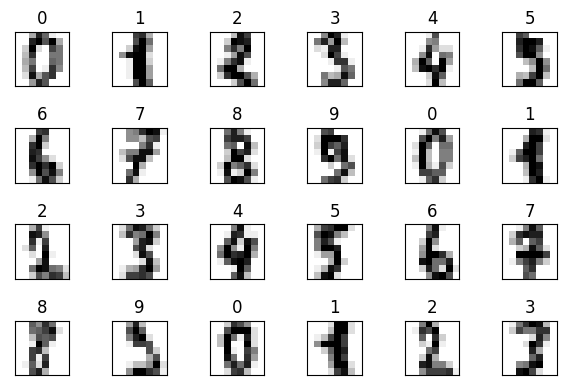

In [3]:
import matplotlib.pyplot as plt


def show_digits(digits, x, y):

    figure, axes = plt.subplots(x, y, figsize=(y, x))

    for item in zip(axes.ravel(), digits.images, digits.target):
        axes, image, target = item
        axes.imshow(image, cmap=plt.cm.gray_r)
        axes.set_xticks([])
        axes.set_yticks([])
        axes.set_title(target)

    plt.tight_layout()
    plt.show()


show_digits(digits, 4, 6)


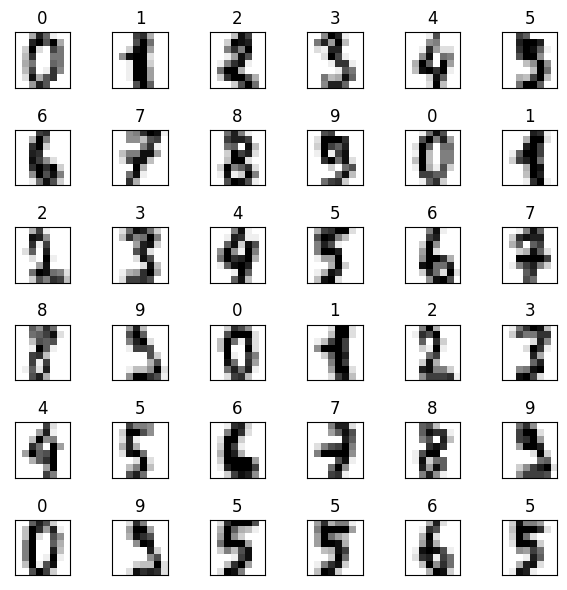

In [4]:
show_digits(digits, 6, 6)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=11)


In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)


KNeighborsClassifier()

In [7]:
predicted = knn.predict(X_test)

expected = y_test

RED_COLOR = '\033[31m'
GREEN_COLOR = '\033[32m'
BLUE_COLOR = '\033[34m'
END_COLOR = '\033[0m'


def compare(predicted_data, expected_data, amount=20):
    line_count = 0
    for pd, ed in zip(predicted_data[:amount], expected_data[:amount]):
        if pd == ed:
            print(
                f"{GREEN_COLOR}{pd}{END_COLOR} => {BLUE_COLOR}{ed}{END_COLOR}", end='  |  ')
        else:
            print(
                f"{RED_COLOR}{pd}{END_COLOR} => {BLUE_COLOR}{ed}{END_COLOR}", end='  |  ')

        line_count += 1
        if line_count == 4:
            print()
            line_count = 0


compare(predicted, expected, 36)


0 => 0  |  4 => 4  |  9 => 9  |  9 => 9  |  
3 => 3  |  1 => 1  |  4 => 4  |  1 => 1  |  
5 => 5  |  0 => 0  |  4 => 4  |  9 => 9  |  
4 => 4  |  1 => 1  |  5 => 5  |  3 => 3  |  
3 => 3  |  8 => 8  |  5 => 3  |  6 => 6  |  
9 => 9  |  6 => 6  |  0 => 0  |  6 => 6  |  
9 => 9  |  3 => 3  |  2 => 2  |  1 => 1  |  
8 => 8  |  1 => 1  |  7 => 7  |  0 => 0  |  
4 => 4  |  4 => 4  |  1 => 1  |  5 => 5  |  


In [8]:
print(f'{knn.score(X_test, y_test):.2%}')


97.78%


In [9]:
from sklearn.metrics import confusion_matrix, classification_report

confusion = confusion_matrix(expected, predicted)

print(confusion)


[[45  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  1  0  1  0  0]
 [ 0  0  0  0 49  0  0  1  0  0]
 [ 0  0  0  0  0 38  0  0  0  0]
 [ 0  0  0  0  0  0 42  0  0  0]
 [ 0  0  0  0  0  0  0 45  0  0]
 [ 0  1  1  2  0  0  0  0 39  1]
 [ 0  0  0  0  1  0  0  0  1 41]]


In [10]:
names = [str(digit) for digit in digits.target_names]

print(classification_report(expected, predicted, target_names=names))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        45
           2       0.98      1.00      0.99        54
           3       0.95      0.95      0.95        44
           4       0.98      0.98      0.98        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        45
           8       0.97      0.89      0.93        44
           9       0.98      0.95      0.96        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [38]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

predicted = svm.predict(X_test)
expected = y_test

compare(predicted, expected, 36)

print(f'{svm.score(X_test, y_test):.2%}')

confusion = confusion_matrix(expected, predicted)


0 => 0  |  4 => 4  |  9 => 9  |  9 => 9  |  
3 => 3  |  1 => 1  |  4 => 4  |  1 => 1  |  
5 => 5  |  0 => 0  |  4 => 4  |  9 => 9  |  
4 => 4  |  1 => 1  |  5 => 5  |  3 => 3  |  
3 => 3  |  8 => 8  |  5 => 3  |  6 => 6  |  
9 => 9  |  6 => 6  |  0 => 0  |  6 => 6  |  
9 => 9  |  3 => 3  |  2 => 2  |  1 => 1  |  
8 => 8  |  1 => 1  |  7 => 7  |  0 => 0  |  
4 => 4  |  4 => 4  |  1 => 1  |  5 => 5  |  
98.67%


In [36]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

predicted = gnb.predict(X_test)
expected = y_test

compare(predicted, expected, 36)

print(f'{gnb.score(X_test, y_test):.2%}')


0 => 0  |  4 => 4  |  7 => 9  |  9 => 9  |  
3 => 3  |  1 => 1  |  4 => 4  |  1 => 1  |  
5 => 5  |  0 => 0  |  7 => 4  |  9 => 9  |  
4 => 4  |  1 => 1  |  5 => 5  |  3 => 3  |  
3 => 3  |  8 => 8  |  5 => 3  |  6 => 6  |  
9 => 9  |  4 => 6  |  0 => 0  |  6 => 6  |  
9 => 9  |  3 => 3  |  2 => 2  |  1 => 1  |  
8 => 8  |  1 => 1  |  7 => 7  |  0 => 0  |  
4 => 4  |  4 => 4  |  1 => 1  |  5 => 5  |  
86.89%


In [37]:
knnhyper = KNeighborsClassifier(n_neighbors=3)
knnhyper.fit(X_train, y_train)

predicted = knnhyper.predict(X_test)
expected = y_test

compare(predicted, expected, 36)

print(f'{knnhyper.score(X_test, y_test):.2%}')


0 => 0  |  4 => 4  |  9 => 9  |  9 => 9  |  
3 => 3  |  1 => 1  |  4 => 4  |  1 => 1  |  
5 => 5  |  0 => 0  |  4 => 4  |  9 => 9  |  
4 => 4  |  1 => 1  |  5 => 5  |  3 => 3  |  
3 => 3  |  8 => 8  |  5 => 3  |  6 => 6  |  
9 => 9  |  6 => 6  |  0 => 0  |  6 => 6  |  
9 => 9  |  3 => 3  |  2 => 2  |  1 => 1  |  
8 => 8  |  1 => 1  |  7 => 7  |  0 => 0  |  
4 => 4  |  4 => 4  |  1 => 1  |  5 => 5  |  
98.22%
